In [54]:
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [55]:
conn = pyodbc.connect('Driver={SQL Server};' # This is what server type we are connecting to
                      'Server=DESKTOP-7TT1T41\SERVER1;' # This is the location and name of the server, same as what we use to connect using SSMS
                      'Database=AdventureWorks2019;' # This is which database we are connecting to within the selected server
                      'Trusted_Connection=yes;') # This allows us to forgo entering a trusted key or password because we are the admin of this computer and the...
                    # ... database has been configured to allow this user when we set it up. 

In [56]:
cursor = conn.cursor()

In [57]:
salesdata = pd.read_sql(query, conn)

C:\Users\Adeyi\AppData\Local\Temp\ipykernel_37512\1111421933.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  salesdata = pd.read_sql(query, conn)


In [58]:
# Selected query from SQL to start generating the most accurate and easily readable visual

In [59]:
query = 'SELECT CountryRegionCode, SUM(SalesYTD) AS TotalSalesYTD FROM [Sales].[SalesTerritory] GROUP BY CountryRegionCode ORDER BY TotalSalesYTD DESC;'

In [60]:
salesdata = pd.read_sql(query, conn)

C:\Users\Adeyi\AppData\Local\Temp\ipykernel_37512\1111421933.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  salesdata = pd.read_sql(query, conn)


In [61]:
print(salesdata.head())

  CountryRegionCode  TotalSalesYTD
0                US   2.641106e+07
1                CA   6.771829e+06
2                AU   5.977815e+06
3                GB   5.012905e+06
4                FR   4.772398e+06


In [62]:
# Bare chart showing the highest and lowest revenue
#Through trial and error I found that the best chart to use was a bar chart. It generated a clear visual of the data
# I made use of colours to further emphasie the highest and lowest revenue in the selected countries

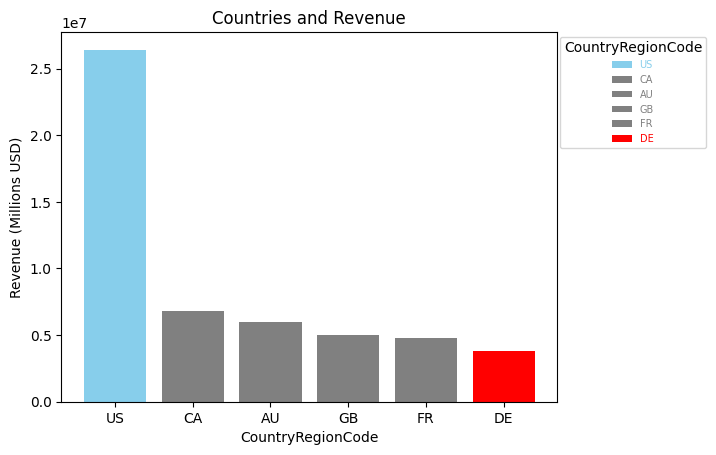

In [63]:
colors = {'US': 'SkyBlue', 'CA': 'grey', 'AU': 'grey', 'GB': 'grey', 'FR': 'grey', 'DE': 'red'}
bars = plt.bar(salesdata['CountryRegionCode'], salesdata['TotalSalesYTD'], color=[colors[code] for code in salesdata['CountryRegionCode']])
plt.xlabel('CountryRegionCode')
plt.ylabel('Revenue (Millions USD)')
plt.title('Countries and Revenue')
legend_labels = salesdata['CountryRegionCode']
legend_colors = [colors[code] for code in salesdata['CountryRegionCode']]
plt.legend(bars, legend_labels, title='CountryRegionCode', loc='upper right', bbox_to_anchor=(1.31, 1), prop={'size': 7}, markerscale=0.3, labelcolor=legend_colors)
plt.show()

In [64]:
# Pie chart to show where the the highest percentage of sales come from which may be more useful for the company to navigate with their figuers and bueget distribution

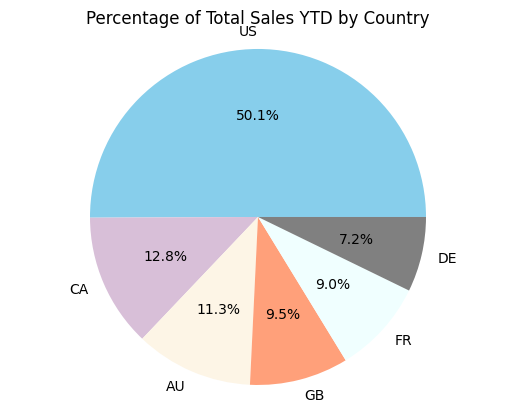

In [65]:
colors = ['skyblue', 'thistle', 'oldlace', 'lightsalmon', 'azure', 'grey']
plt.pie(salesdata['TotalSalesYTD'], labels=salesdata['CountryRegionCode'], autopct='%1.1f%%', colors = colors)
plt.axis('equal')
plt.title('Percentage of Total Sales YTD by Country')
plt.show()

In [66]:
# Selected modified query from SQL that include TotalSalesLastYear to provide comparision between current and past.
# Here we can clearly see an increase in revenue in all countries

In [67]:
query = 'SELECT CountryRegionCode, SUM(SalesYTD) AS TotalSalesYTD, SUM(SalesLastYear) AS TotalSalesLastYear FROM [Sales].[SalesTerritory] GROUP BY CountryRegionCode ORDER BY TotalSalesYTD DESC;'

In [68]:
salesdata = pd.read_sql(query, conn)

C:\Users\Adeyi\AppData\Local\Temp\ipykernel_37512\1111421933.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  salesdata = pd.read_sql(query, conn)


In [69]:
# Printed the data from the table viewed in SQL

In [70]:
print(salesdata.head())

  CountryRegionCode  TotalSalesYTD  TotalSalesLastYear
0                US   2.641106e+07        1.940250e+07
1                CA   6.771829e+06        5.693989e+06
2                AU   5.977815e+06        2.278549e+06
3                GB   5.012905e+06        1.635823e+06
4                FR   4.772398e+06        2.396540e+06


In [71]:
# Used a colour coded side-by-side bar chart to closely show the comparison between the current revenue and and the total revenue last year

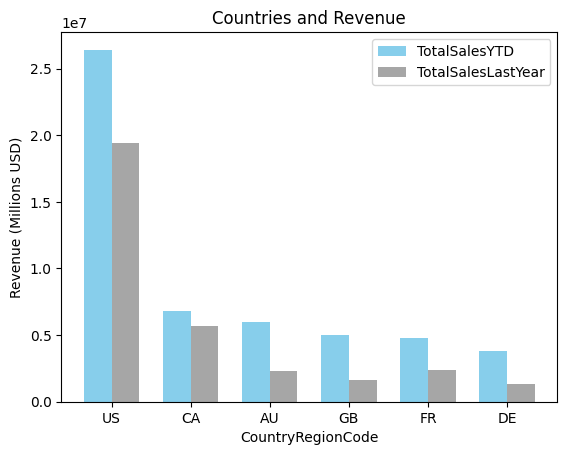

In [72]:
bar_width = 0.35
bar_positions_ytd = range(len(salesdata))
bar_positions_last_year = [pos + bar_width for pos in bar_positions_ytd]
plt.bar(bar_positions_ytd, salesdata['TotalSalesYTD'], width=bar_width, color='skyblue', label='TotalSalesYTD')
plt.bar(bar_positions_last_year, salesdata['TotalSalesLastYear'], width=bar_width, color='grey', label='TotalSalesLastYear', alpha=0.7)
plt.xlabel('CountryRegionCode')
plt.ylabel('Revenue (Millions USD)')
plt.title('Countries and Revenue')
plt.xticks([pos + bar_width / 2 for pos in bar_positions_ytd], salesdata['CountryRegionCode'])
plt.legend()
plt.show()

In [73]:
# Pie chart showing Percentage of total sales last year 

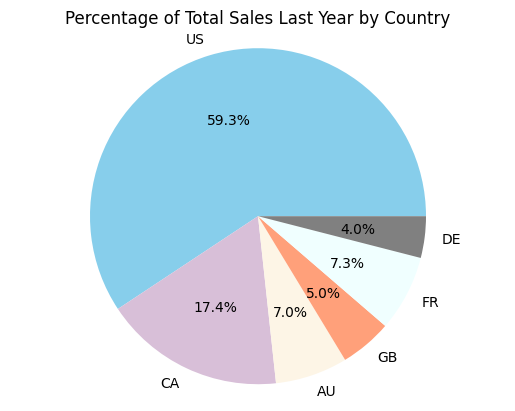

In [74]:
colors = ['skyblue', 'thistle', 'oldlace', 'lightsalmon', 'azure', 'grey']
plt.pie(salesdata['TotalSalesLastYear'], labels=salesdata['CountryRegionCode'], autopct='%1.1f%%', colors = colors)
plt.axis('equal')
plt.title('Percentage of Total Sales Last Year by Country')
plt.show()